In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling1D, Flatten, Dense,Dropout

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
data_path = r'/content/drive/MyDrive/HIL/HIL_gwl_v2.csv'

In [ ]:
data = pd.read_csv(data_path,index_col='date')

In [ ]:
data.index = pd.to_datetime(data.index)

In [ ]:
data['weekday'] = data.index.weekday.values

In [ ]:
data['lag_1'] = data['level (m)'].shift(1)

In [ ]:
data

,Consumption (KL),level (m),temp,rain,evpt,radiation,day_light,weekday,lag_1
date,,,,,,,,,
2023-01-01,102,9.23250,21.9,0.2,2.53,12.36,39054.18,6,NaN
2023-01-02,108,9.37075,20.7,0.3,2.47,12.29,39073.20,0,9.23250
2023-01-03,82,9.54550,20.7,0.0,3.03,14.60,39093.97,1,9.37075
2023-01-04,123,9.50625,19.4,0.0,3.20,15.07,39116.46,2,9.54550
2023-01-05,121,9.55625,19.3,0.0,3.35,14.79,39140.61,3,9.50625
...,...,...,...,...,...,...,...,...,...
2024-01-27,108,11.08250,17.6,0.0,2.93,15.51,40013.74,5,10.99500
2024-01-28,111,11.24250,17.8,0.0,3.12,16.96,40067.66,6,11.08250
2024-01-29,121,11.44750,18.7,0.0,3.11,16.96,40122.34,0,11.24250


In [ ]:
data.dropna(inplace=True)

In [ ]:
data

,Consumption (KL),level (m),temp,rain,evpt,radiation,day_light,weekday,lag_1
date,,,,,,,,,
2023-01-02,108,9.37075,20.7,0.3,2.47,12.29,39073.20,0,9.23250
2023-01-03,82,9.54550,20.7,0.0,3.03,14.60,39093.97,1,9.37075
2023-01-04,123,9.50625,19.4,0.0,3.20,15.07,39116.46,2,9.54550
2023-01-05,121,9.55625,19.3,0.0,3.35,14.79,39140.61,3,9.50625
2023-01-06,74,9.60000,18.3,0.0,4.34,16.07,39166.38,4,9.55625
...,...,...,...,...,...,...,...,...,...
2024-01-27,108,11.08250,17.6,0.0,2.93,15.51,40013.74,5,10.99500
2024-01-28,111,11.24250,17.8,0.0,3.12,16.96,40067.66,6,11.08250
2024-01-29,121,11.44750,18.7,0.0,3.11,16.96,40122.34,0,11.24250


In [ ]:
y_data = data[['level (m)']]
x_data = data.drop('level (m)',axis=1)

In [ ]:
x_data.head()

,Consumption (KL),temp,rain,evpt,radiation,day_light,weekday,lag_1
date,,,,,,,,
2023-01-02,108,20.7,0.3,2.47,12.29,39073.20,0,9.23250
2023-01-03,82,20.7,0.0,3.03,14.60,39093.97,1,9.37075
2023-01-04,123,19.4,0.0,3.20,15.07,39116.46,2,9.54550
2023-01-05,121,19.3,0.0,3.35,14.79,39140.61,3,9.50625
2023-01-06,74,18.3,0.0,4.34,16.07,39166.38,4,9.55625


In [ ]:
x_scaler = MinMaxScaler(feature_range=(0, 1))
y_scaler = MinMaxScaler(feature_range=(0, 1))
scaled_y = y_scaler.fit_transform(y_data)
scaled_x = x_scaler.fit_transform(x_data)

In [ ]:
def inverse(scaler,data):
  return scaler.inverse_transform(data)

In [ ]:
X = scaled_x
Y = scaled_y

In [ ]:
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

In [ ]:
X_train.shape

(355, 8)

In [ ]:
Y_train.shape

(355, 1)

In [ ]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 112)               1008      
                                                                 
 dense_1 (Dense)             (None, 112)               12656     
                                                                 
 dense_2 (Dense)             (None, 112)               12656     
                                                                 
 dense_3 (Dense)             (None, 1)                 113       
                                                                 
Total params: 26433 (103.25 KB)
Trainable params: 26433 (103.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
best_para = tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
model = tuner.hypermodel.build(best_para)

In [ ]:
best_para.get('units')

112

In [ ]:
best_para.get('learning_rate')

0.0014159013664792421

In [ ]:
model.layers[0]

In [ ]:
model.get_layer(name='dense_7').units

1

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4, 96)             864       
                                                                 
 dense_5 (Dense)             (None, 4, 96)             9312      
                                                                 
 dense_6 (Dense)             (None, 4, 96)             9312      
                                                                 
 dense_7 (Dense)             (None, 4, 1)              97        
                                                                 
Total params: 19585 (76.50 KB)
Trainable params: 19585 (76.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
def create_model():
  model = Sequential()
  model.add(Dense(112,input_shape=(X.shape[1],),activation='relu'))
  model.add(Dense(112,activation='relu'))
  model.add(Dense(112,activation='relu'))
  model.add(Dense(1))
  model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0014159013664792421),
        loss='mse'
    )
  return model

In [ ]:
model = create_model()
model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
12/12 [==============================] - 1s 4ms/step - loss: 0.1463
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 0.0202
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 0.0048
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 0.0016
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 8.5968e-04
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 6.1184e-04
Epoch 8/100
12/12 [==============================] - 0s 5ms/step - loss: 7.0803e-04
Epoch 9/100
12/12 [==============================] - 0s 5ms/step - loss: 5.7436e-04
Epoch 10/100
12/12 [==============================] - 0s 4ms/step - loss: 5.8353e-04
Epoch 11/100
12/12 [==============================] - 0s 4ms/step - loss: 4.9267e-04
Epoch 12/100
12/12 [==============================] - 0s 3ms/step - loss: 5.1578e-04
Epoch 13/

In [ ]:
train_predict = inverse(y_scaler,model.predict(X_train))
test_predict = inverse(y_scaler,model.predict(X_test))

2/2 [==============================] - 0s 6ms/step


In [ ]:
Y_train_act = inverse(y_scaler,Y_train)
y_test = inverse(y_scaler,Y_test)

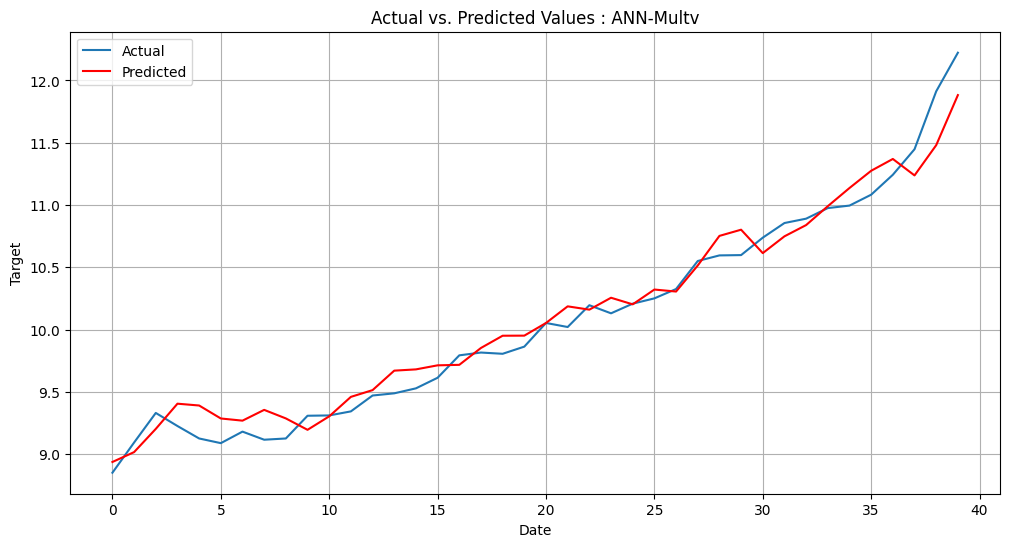

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(test_predict, label='Predicted', color='red')
plt.title('Actual vs. Predicted Values : ANN-Multv')
plt.xlabel('Date')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Calculate the mean squared error
mse_train = mean_squared_error(Y_train_act, train_predict)
mse_test = mean_squared_error(y_test, test_predict)

# Calculate RMSE
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Calculate R²
r2_train = r2_score(Y_train_act, train_predict)
r2_test = r2_score(y_test, test_predict)

# Calculate MAE
mae_train = mean_absolute_error(Y_train_act, train_predict)
mae_test = mean_absolute_error(y_test, test_predict)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_train = mean_absolute_percentage_error(Y_train_act, train_predict)
mape_test = mean_absolute_percentage_error(y_test, test_predict)

# Print the metrics
print(f'Training MSE: {mse_train}')
print(f'Testing MSE: {mse_test}')
print(f'Training RMSE: {rmse_train}')
print(f'Testing RMSE: {rmse_test}')
print(f'Training R²: {r2_train}')
print(f'Testing R²: {r2_test}')
print(f'Training MAE: {mae_train}')
print(f'Testing MAE: {mae_test}')
print(f'Training MAPE: {mape_train}')
print(f'Testing MAPE: {mape_test}')


Training MSE: 0.020901672138119783
Testing MSE: 0.02399614289776794
Training RMSE: 0.14457410604295565
Testing RMSE: 0.15490688460416452
Training R²: 0.9976937998238847
Testing R²: 0.9656761394340165
Training MAE: 0.10384442578935527
Testing MAE: 0.12608308696746842
Training MAPE: 1.2143633947623866
Testing MAPE: 1.2431341257848763


In [ ]:
tscv = TimeSeriesSplit(n_splits=5)

# Cross-validation
rnn_rmses = []
for train_index, test_index in tscv.split(X):
    val_X_train, val_X_test = X[train_index], X[test_index]
    val_y_train, val_y_test = Y[train_index], Y[test_index]

    # Create and train the RNN model
    model.fit(val_X_train, val_y_train, epochs=20)
    # Evaluate the model
    y_pred = model.predict(val_X_test)
    rmse = np.sqrt(mean_squared_error(inverse(y_scaler,val_y_test), inverse(y_scaler,y_pred)))
    rnn_rmses.append(rmse)
    print(f'Fold RMSE: {rmse}')

# Print average RMSE across folds
print(f'Average cross-validation RMSE: {np.mean(rnn_rmses)}')

Epoch 1/20
3/3 [==============================] - 0s 5ms/step - loss: 2.0534e-04
Epoch 2/20
3/3 [==============================] - 0s 4ms/step - loss: 1.6375e-04
Epoch 3/20
3/3 [==============================] - 0s 4ms/step - loss: 1.2176e-04
Epoch 4/20
3/3 [==============================] - 0s 4ms/step - loss: 8.0307e-05
Epoch 5/20
3/3 [==============================] - 0s 4ms/step - loss: 6.9100e-05
Epoch 6/20
3/3 [==============================] - 0s 5ms/step - loss: 8.6388e-05
Epoch 7/20
3/3 [==============================] - 0s 5ms/step - loss: 1.0156e-04
Epoch 8/20
3/3 [==============================] - 0s 4ms/step - loss: 6.5897e-05
Epoch 9/20
3/3 [==============================] - 0s 5ms/step - loss: 4.8033e-05
Epoch 10/20
3/3 [==============================] - 0s 5ms/step - loss: 4.7089e-05
Epoch 11/20
3/3 [==============================] - 0s 4ms/step - loss: 5.3856e-05
Epoch 12/20
3/3 [==============================] - 0s 4ms/step - loss: 6.9042e-05
Epoch 13/20
3/3 [========